In [262]:
%run dyck_path_2.ipynb

[0, 2, 4]
[0, 2, 4]
[1, 2] 3
[1, 6, 5] 12
moyenne
[2/3, 4/3]
[[0, 1, 2, 3], [0, 0, 2, 3], [0, 1, 1, 3], [0, 1, 2, 2], [0, 0, 0, 3], [0, 0, 2, 2], [0, 0, 1, 3], [0, 1, 1, 1], [0, 1, 1, 2], [0, 0, 0, 0], [0, 0, 0, 2], [0, 0, 0, 1], [0, 0, 1, 1], [0, 0, 1, 2]]
1 ,1 ,
3 ,6 ,
1 ,1 ,
3 ,6 ,
0 ,0 ,
0 ,0 ,
1 ,1 ,
9 ,36 ,
2^4 * 17^2
7 * 19 * 37 * 107
3 * 5 * 7 * 11 * 67 * 193
2 * 5 * 13 * 41 * 103 * 367
3^3 * 7^2 * 37 * 149 * 233
2^2 * 17
7 * 107
3 * 7 * 193
41 * 367
3^3 * 7 * 233
1 0
68 0
703 1
210
5647


In [221]:
#from mireille paper
def dyck_a_chemin(t,d):
    res=[]
    for i in srange(1,len(t)):
        res=res+[1 for k in srange(d)]
        for j in range(t[i]-t[i-1]):
            res.append(-1)
    res=res+[1 for k in range(d)]+[-1 for k in range(len(t)*d-t[len(t)-1])]

    return res

def catas_a_chemin(t,d):
    res=[]
    for i in srange(1,len(t)):
        res=res+[1 for k in srange(d)]
        for j in range(t[i]-t[i-1]):
            res.append(-1)
    res=res+[1 for k in range(d)]+[-1 for k in range(len(t)*d-t[len(t)-1])]

    return res
#print (dyck_a_chemin([0,1,1],1)) 
def chemin_a_dyck_bis(t,d,l,i):
    if t==[]:
        return l
    elif t[0]==1:
        for j in range(d):
            t.pop(0)
        return chemin_a_dyck_bis(t,d,l+[i],i)
    else:
        t.pop(0)
        return chemin_a_dyck_bis(t,d,l,i+1)
        
    
def chemin_a_dyck(t,d):
    l=deepcopy(t)
    return chemin_a_dyck_bis(l,d,[],0)
def codage_miroir_chemin(l):
    l=deepcopy(l)
    for i in range(0,len(l)):
        if l[i]==1:
            l[i]=-1
        else:
            l[i]=1
    l.reverse()
    return l
def codage_miroir(x,d):
    l=dyck_a_chemin(x,d)
    l=codage_miroir_chemin(l)
    l=chemin_a_dyck(l,d)
    return l
#print (dyck_a_chemin([0,1,1],1))
print (chemin_a_dyck(dyck_a_chemin([0,1,1],1),1))
x=dyck_a_chemin([0,1,1],1)
print ("x",x)
x=codage_miroir_chemin(x)
print ("x",x)

print (chemin_a_dyck(x,1))

# print chemin_a_dyck(dyck_a_chemin([0,1,2],2),2)

[0, 1, 1]
x [1, -1, 1, 1, -1, -1]
x [1, 1, -1, -1, 1, -1]
[0, 0, 2]


In [267]:
#from mireille paper

def initial_consecutive_runs(t,d):
    res=[]
    for i in srange(0,d):
        for j in srange(i+2,len(t)+1):
#             print i,j,sum(t[i:j])
            if sum(t[i:j])==0:
                res.append(j//d)
                break
    return res

#returns a pointed dyck chemin
def mreduction(p,d):
#    print ("mreduc p",p,"d",d)
    p_prime=deepcopy(p)
    init_runs=initial_consecutive_runs(p,d)
#    print ("init", init_runs)
    for i in range(0,d):
#         print "pprime",p_prime,"i",i, "init_runs",init_runs
        p_prime[i]=0
#         print "d*init_runs[i]-1",d*init_runs[i]-1,"i",i
        p_prime[d*init_runs[i]-1+i]=0
        init_runs[i]=init_runs[i]-(d-i)
#    print ("before prprime",p_prime)
    for i in range(0,2*d):
        p_prime.remove(0)
    return [p_prime]+init_runs
    
    return 0
print (DyckWord(ctd(dyck_a_chemin([0,0],2))).to_path_string())
print (DyckWord(ctd(dyck_a_chemin([0,1],2))).to_path_string())
print (DyckWord(ctd(dyck_a_chemin([0,2],2))).to_path_string())
#print (DyckWord(ctd(mreduction(dyck_a_chemin([0,1,2],1),1)[0])).to_path_string())


   /\   
  /  \  
 /    \ 
/      \
    /\  
 /\/  \ 
/      \
 /\  /\ 
/  \/  \


In [369]:
def ctd(t):
    r=deepcopy(t)
    for i in range(0,len(t)):
        if t[i]==-1:
            r[i]=0
    return r
def print_dyck(x,d):
    print(DyckWord(ctd(x)).to_path_string())
    
    
x=[0,1,2,3]
d=1
print (x)
print(DyckWord(ctd(dyck_a_chemin(x,d))).to_path_string())
for e in dyck_semi2(x,d):
    print (e)
    print (DyckWord(ctd(dyck_a_chemin(e,d))).to_path_string())
x=codage_miroir(x,1)
d=1
print ("lol",x)
print(DyckWord(ctd(dyck_a_chemin(x,d))).to_path_string())
for e in dyck_semi2(x,d):
    print (e)
    print (DyckWord(ctd(dyck_a_chemin(e,d))).to_path_string())
print ("lol",x)
print(DyckWord(ctd(dyck_a_chemin(x,d))).to_path_string())
for e in dyck_tamari(x,d):
    print (e)
    print (DyckWord(ctd(dyck_a_chemin(e,d))).to_path_string())
   # print_dyck(e,d)

[0, 1, 2, 3]
/\/\/\/\
[0, 0, 2, 3]
 /\     
/  \/\/\
[0, 1, 1, 3]
   /\   
/\/  \/\
[0, 1, 2, 2]
     /\ 
/\/\/  \
lol [0, 1, 2, 3]
/\/\/\/\
[0, 0, 2, 3]
 /\     
/  \/\/\
[0, 1, 1, 3]
   /\   
/\/  \/\
[0, 1, 2, 2]
     /\ 
/\/\/  \
lol [0, 1, 2, 3]
/\/\/\/\
[0, 0, 2, 3]
 /\     
/  \/\/\
[0, 1, 1, 3]
   /\   
/\/  \/\
[0, 1, 2, 2]
     /\ 
/\/\/  \


In [348]:
liste_contact_point=[]
def chemin_plus_petit_que_tamari(p,q,d):
#     print p
#     print DyckWord(ctd(p)).to_path_string()
#     print q
#     print DyckWord(ctd(q)).to_path_string()

#     print "plus petit p",p,"q",q
    if (p==([1 for i in range(d)]+[-1 for i in range(d)])):
        return 1
    pr=mreduction(p,d)
    qr=mreduction(q,d)
#     print "plus petit pr ,qr",pr[1:],qr[1:]
    for i in range(1,d+1):
        if qr[i]<pr[i]:
            if [pr[1:],qr[1:]] not in liste_contact_point:
                liste_contact_point.append([pr[1:],qr[1:]])
#             print "probleme pr",pr[1:],"qr",qr[1:]
            return 0
    return chemin_plus_petit_que_tamari(pr[0],qr[0],d)

print (chemin_plus_petit_que_tamari(dyck_a_chemin([0,0,2],1) ,dyck_a_chemin([0,0,1],1),1))
print (dyck_smaller_than_semi([0,0,2],[0,0,1],1))   

1
0


In [482]:
liste_contact_point=[]
def chemin_plus_petit_que_semi(p,q,d):
#    print("1")
#    print_dyck(p,d)
#    print_dyck(q,d)
    return chemin_plus_petit_que_semi_bis(codage_miroir_chemin(p),codage_miroir_chemin(q),1)
    #return chemin_plus_petit_que_semi_bis(p,q,1)
    
def chemin_plus_petit_que_semi_bis(p,q,d):
#    print("r")
#    print_dyck(p,d)
#    print_dyck(q,d)
#     print p
#     print DyckWord(ctd(p)).to_path_string()
#     print q
#     print DyckWord(ctd(q)).to_path_string()

#     print "plus petit p",p,"q",q
  
    if (p==([1 for i in range(d)]+[-1 for i in range(d)])):
        return 1
    pr=mreduction(p,d)
    qr=mreduction(q,d)
#    print ("plus petit pr ,qr",pr[1:],qr[1:])
    for i in range(1,d+1):
        if qr[i]<pr[i]:
            if [pr[1:],qr[1:]] not in liste_contact_point:
                liste_contact_point.append([pr[1:],qr[1:]])
            print ("probleme pr",pr[1],"qr",qr[1])
            return 0
    return chemin_plus_petit_que_semi_bis(pr[0],qr[0],d)

#print (chemin_plus_petit_que_tamari(dyck_a_chemin([0,0,2],1) ,dyck_a_chemin([0,0,1],1),1))
#print (dyck_smaller_than_semi([0,0,2],[0,0,1],1))   

In [332]:
n=2
d=2
l=generer_tout_dyck(n,d,0)[0]
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
    if dyck_smaller_than_tamari(l[i],l[j],d):
#         if chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)!=1:
        if chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)!=1:
            print ("prob",l[i],l[j])

prob [0, 2] [0, 1]
prob [0, 2] [0, 0]
prob [0, 1] [0, 0]


In [486]:
n=4
d=2
l=generer_tout_dyck(n,d,0)[0]
#for e in l:
#    print (e)
#    print_dyck(dyck_a_chemin(e,d),d)
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
    if chemin_plus_petit_que_semi(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d):
        if dyck_smaller_than_semi(l[i],l[j],d)!=1:
            print ("**********************")
            print (l[i],l[j])
        else:
            print("oui")
            #chemin_plus_petit_que(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)
    if dyck_smaller_than_semi(l[i],l[j],d):
        if chemin_plus_petit_que_semi(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)!=1:
            print ("///////////////////////")
            print (l[i],l[j])
        else:
            print("ok")

oui
ok
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 1, 4, 6]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 2, 3, 6]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 2, 4, 5]
oui
ok
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 1, 3, 6]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 1, 4, 5]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 1, 2, 6]
oui
ok
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 2, 3, 5]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 2, 3, 4]
oui
ok
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 0, 3, 6]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 0, 4, 5]
probleme pr 3 qr 1
probleme pr 3 qr 1
///////////////////////
[0, 2, 4, 6] [0, 1, 3, 5]
prob

In [354]:
n=3
d=1
l=generer_tout_dyck(n,d,0)[0]
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
#     print "**********************"
#     print l[i],l[j]
    if dyck_smaller_than_semi(l[i],l[j],d):
        chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)
#             chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)
for e in liste_contact_point:
    print (e)

[[3], [1]]
[[2, 0], [0, 0]]
[[2, 2], [4, 0]]
[[2, 2], [0, 0]]
[[4, 0], [0, 0]]
[[2, 2], [2, 0]]
[[4, 2], [4, 0]]
[[4, 4], [4, 0]]


In [351]:
n=3
d=2
l=generer_tout_dyck(n,d,0)[0]
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
#     print "**********************"
#     print l[i],l[j]
    if dyck_smaller_than_tamari(l[i],l[j],d):
        #if chemin_plus_petit_que_tamari(codage_miroir_chemin(dyck_a_chemin(l[i],d)),codage_miroir_chemin(dyck_a_chemin(l[j],d)),d)==0:
        if chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)==0:
            print(l[i],l[j])
        
        
#             chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)
print ("")
#for e in  liste_contact_point:
#    print (e)

In [340]:
l2=[
    [[4, 2], [4, 4]] ,
[[0, 0], [0, 0]] ,
[[0, 0], [2, 0]] ,
[[0, 0], [2, 2]] ,
[[0, 0], [4, 0]] ,
[[0, 0], [4, 2]] ,
[[0, 0], [4, 4]] ,
[[2, 0], [2, 0]] ,
[[2, 0], [2, 2]] ,
[[2, 0], [4, 2]] ,
[[2, 0], [4, 4]] ,
[[2, 0], [4, 0]] ,
[[2, 0], [0, 0]] ,
[[2, 2], [2, 2]] ,
[[2, 2], [4, 2]] ,
[[2, 2], [4, 4]] ,
[[4, 0], [4, 0]] ,
[[4, 0], [4, 2]] ,
[[4, 0], [4, 4]] ,
[[2, 2], [2, 0]] ,
[[2, 2], [0, 0]] ,
[[4, 2], [4, 2]] ,
[[4, 4], [4, 4]] , 
]
for e in liste_contact_point:
    if e not in l2:
        print e

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(e)? (<ipython-input-340-f8089d4cd334>, line 28)

In [210]:
n=5
d=2
l=generer_tout_dyck(n,d,0)[0]
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
    if dyck_smaller_than_semi(l[i],l[j],d):
            print "**********************"
            print l[i],l[j]
            print chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)

**********************
[0, 2, 4, 6, 8] [0, 2, 4, 6, 8]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
1
**********************
[0, 2, 4, 6, 8] [0, 1, 4, 6, 8]
plus petit pr ,qr [0, 0] [2, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
1
**********************
[0, 2, 4, 6, 8] [0, 2, 3, 6, 8]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [2, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
1
**********************
[0, 2, 4, 6, 8] [0, 2, 4, 5, 8]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [2, 0]
plus petit pr ,qr [0, 0] [0, 0]
1
**********************
[0, 2, 4, 6, 8] [0, 2, 4, 6, 7]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [0, 0]
plus petit pr ,qr [0, 0] [2, 0]
1
**********************
[0, 2, 4, 6, 8] [0, 0, 4, 6, 8]
plus petit pr ,qr [0

In [206]:
n=4
d=2
l=generer_tout_dyck(n,d,0)[0]
for e in l:
    print "NOUVEAUUUUUUUUUUUUUU"
    rota=dyck_semi2(e,d)
    for a in rota:
        print "****************"
        print e,a
        print DyckWord(ctd(dyck_a_chemin(e,d))).to_path_string()
        print DyckWord(ctd(dyck_a_chemin(a,d))).to_path_string()

NOUVEAUUUUUUUUUUUUUU
****************
[0, 2, 4, 6] [0, 1, 4, 6]
 /\  /\  /\  /\ 
/  \/  \/  \/  \
    /\          
 /\/  \  /\  /\ 
/      \/  \/  \
****************
[0, 2, 4, 6] [0, 2, 3, 6]
 /\  /\  /\  /\ 
/  \/  \/  \/  \
        /\      
 /\  /\/  \  /\ 
/  \/      \/  \
****************
[0, 2, 4, 6] [0, 2, 4, 5]
 /\  /\  /\  /\ 
/  \/  \/  \/  \
            /\  
 /\  /\  /\/  \ 
/  \/  \/      \
NOUVEAUUUUUUUUUUUUUU
****************
[0, 1, 4, 6] [0, 0, 4, 6]
    /\          
 /\/  \  /\  /\ 
/      \/  \/  \
   /\           
  /  \          
 /    \  /\  /\ 
/      \/  \/  \
****************
[0, 1, 4, 6] [0, 1, 1, 6]
    /\          
 /\/  \  /\  /\ 
/      \/  \/  \
      /\        
     /  \       
    /    \      
 /\/      \  /\ 
/          \/  \
****************
[0, 1, 4, 6] [0, 1, 4, 5]
    /\          
 /\/  \  /\  /\ 
/      \/  \/  \
    /\      /\  
 /\/  \  /\/  \ 
/      \/      \
NOUVEAUUUUUUUUUUUUUU
****************
[0, 2, 3, 6] [0, 1, 3, 6]
        /\      
 /\  /\

In [50]:
def dyck_a_dyckf(t,d):
    r=[]
    nb_noeud_visite=1
    for i in range(1,len(t)):
        for j in range(t[i-1],t[i]):
            r.append(nb_noeud_visite)
        nb_noeud_visite+=1
    #pour le dernier
    r=r+[nb_noeud_visite for j in range(d+1)]
    nb_feuilles_restantes=(len(t)*d)+1-len(r)
    r=r+[nb_noeud_visite for j in range(nb_feuilles_restantes)]
    return [0]+r
p=[0,1,3]
print p,dyck_a_dyckf(p,2)
print "rotations"
x=dyck_semi2(p,2)
for e in x:
    print e,dyck_a_dyckf(e,2)

[0, 1, 3] [0, 1, 2, 2, 3, 3, 3, 3]
rotations
[0, 0, 3] [0, 2, 2, 2, 3, 3, 3, 3]
[0, 1, 2] [0, 1, 2, 3, 3, 3, 3, 3]


In [273]:
e=[0,1,3]
print e,dyck_a_dyckf(e,2)
rota=dyck_semi2(e,d)
print DyckWord(ctd(dyck_a_chemin(dyck_a_dyckf(e,2),2))).to_path_string()
# DyckWord(ctd(dyck_a_chemin(dyck_a_dyckf(e,2),d))).to_path_string()
for a in rota:
    x=dyck_a_dyckf(a,2)
    print a,x
    print DyckWord(ctd(dyck_a_chemin(x,d))).to_path_string()

[0, 1, 3] [0, 1, 2, 2, 3, 3, 3, 3]
                  /\            
                 /  \           
                /    \          
               /      \         
              /        \        
             /          \       
            /            \      
         /\/              \     
        /                  \    
       /                    \   
    /\/                      \  
 /\/                          \ 
/                              \
[0, 0, 3] [0, 2, 2, 2, 3, 3, 3, 3]
                  /\            
                 /  \           
                /    \          
               /      \         
              /        \        
             /          \       
            /            \      
         /\/              \     
        /                  \    
       /                    \   
      /                      \  
 /\  /                        \ 
/  \/                          \
[0, 1, 2] [0, 1, 2, 3, 3, 3, 3, 3]
                  /\            
    

In [243]:
print DyckWord(ctd(dyck_a_chemin([0, 1, 3, 3, 4, 4, 4, 4, 4, 4],d))).to_path_string()

                       /\               
                      /  \              
                     /    \             
                    /      \            
                   /        \           
                  /          \          
                 /            \         
                /              \        
               /                \       
              /                  \      
             /                    \     
          /\/                      \    
         /                          \   
    /\  /                            \  
 /\/  \/                              \ 
/                                      \


In [244]:
print DyckWord(ctd(dyck_a_chemin([0, 1, 2, 2, 3, 3, 3, 4, 4, 4],d))).to_path_string()

                       /\               
                      /  \              
                     /    \             
                    /      \            
                   /        \           
                /\/          \          
               /              \         
              /                \        
             /                  \       
            /                    \      
         /\/                      \     
        /                          \    
       /                            \   
    /\/                              \  
 /\/                                  \ 
/                                      \


In [27]:
def detect_sibling(t,ind,m):
    newWord = deepcopy(t)
    difference = t[ind] - t[ind-1]
    if ind < 1:
        return "WRONG"
    if difference == 0:
        return "last_two_equal", None
    else:
        counter=0
        j=m+1
        for i in srange(ind-1,-1,-1):
            counter=counter+(t[i+1]-t[i])
            if counter <j: #on reste dans la branche
                while i<ind:
                    counter=counter-(t[i+1]-t[i])
                    j=j-m
                    i=i+1
                    if counter==j:
                        return "non-leaf", i #non-leaf
                break
            j=j+m
        return "leaf", None #leaf

In [37]:
def semireduction(t,m):

    sibling_type, sibling_index = detect_sibling(t,len(t)-1,m)
    
    if sibling_type == "leaf": #sibling is leaf
        return t[:-1], t[-1], t[-1] - 1
    
    elif sibling_type == "non-leaf":
        newTree = rotate_word2(t,len(t)-1,m)
        return t[:-1], t[-1], newTree[-1]
    
    elif sibling_type == "last_two_equal":
        return t[:-1], t[-1], t[-1]

def p_is_bigger_than_q(p,q,d, verbose=False):
    
    for a,b in zip(p,q):
        if a > b:
            return 0
        
    if (p==[0]): #(p==q) and 
        return 1
    pr=semireduction(p,d)
    qr=semireduction(q,d)
    if verbose:
        print("plus petit pr ,qr",pr,qr)
    if pr[1] > qr[1] or pr[2] > qr[2]:
        return 0
    return p_is_bigger_than_q(pr[0],qr[0],d,verbose)


In [38]:
n=3
d=1
l=generer_tout_dyck(n,d,0)[0]
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
    if dyck_smaller_than_semi(l[i],l[j],d):
        if p_is_bigger_than_q(l[j],l[i],d) != 1:
            print("**********************")
            print(l[j],l[i])
            p_is_bigger_than_q(l[j],l[i],d,True)
#             chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)

**********************
([0, 0, 4], [0, 1, 4])
('plus petit pr ,qr', ([0, 0], 4, 3), ([0, 1], 4, 1))


In [19]:
dyck_smaller_than_semi([0, 1, 3, 6],[0, 0, 2, 6],2)

1

In [21]:
P,y=poset_dyck(4,2,1)
shortest_path_dyck(P,[0, 1, 3, 6],[0, 0, 2, 6])

[(0, 1, 3, 6), (0, 1, 2, 6), (0, 0, 2, 6)]

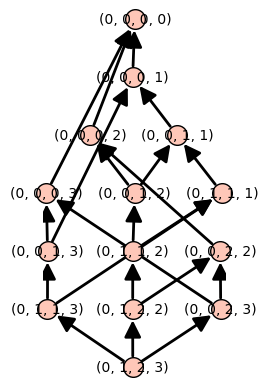

True
68
21


In [305]:
P,y=poset_dyck(4,1,1)
P.show()
print(P.is_lattice())
print(len(P.relations()))
print(len(P.cover_relations()))

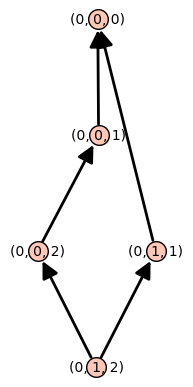

True
13
5


In [425]:
Q,z=poset_dyck(3,1,0)
Q.show()
print (Q.is_lattice())
print(len(Q.relations()))
print(len(Q.cover_relations()))

In [307]:
#print(P.is_isomorphic(Q))
print("tam included in semi",P.has_isomorphic_subposet(Q))
print("semi is graded",P.is_graded())
print("tam is graded",Q.is_graded())
print("semi is ranked",P.is_ranked())
print("tam is ranked",Q.is_ranked())
print("semi is series par",P.is_series_parallel())
print("tam is series par",Q.is_series_parallel())
print("semi is greedy",P.is_greedy())
print("tam is greedy",Q.is_greedy())
print("semi is jump critic",P.is_jump_critical())
print("tam is jump critic",Q.is_jump_critical())
#print("semi is eulerian",P.is_eulerian())
#print("tam is eulerian",Q.is_eulerian())
#print("semi is chain free",P.is_incomparable_chain_free())
#print("tam is chain free",Q.is_incomparable_chain_free())
#print("semi is splender",P.is_splender())
#print("tam is splender",Q.is_splender())
#print("semi is sperner",P.is_sperner())
#print("tam is sperner",Q.is_sperner())

tam included in semi True
semi is graded False
tam is graded False
semi is ranked False
tam is ranked False
semi is series par False
tam is series par False
semi is greedy False
tam is greedy False
semi is jump critic False
tam is jump critic False


x [0, 2]
[0, 1]
[0, 0, 1]
x [0, 0, 1]
[0, 0, 0, 0]
[0, 0, 0, 0]
x [0, 0, 0, 0]


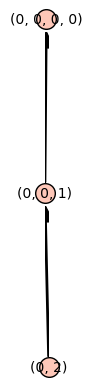

True
6


In [263]:
P,y=poset_dyck(2,2,4)
P.show()
print(P.is_lattice())
print(len(P.relations()))

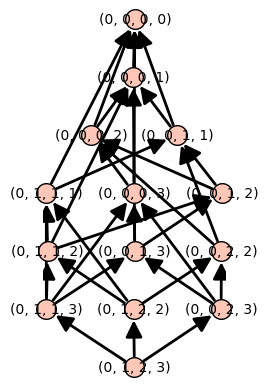

False
83


In [101]:
P,y=poset_dyck(4,1,2)
P.show()
print (P.is_lattice())
print(len(P.relations()))

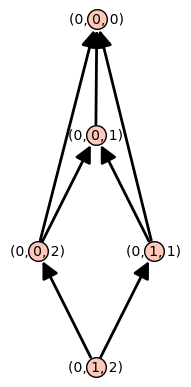

True
14


In [97]:
P,y=poset_mix(3,1)
P.show()
print (P.is_lattice())
print(len(P.relations()))

In [36]:
n=3
d=2
l=generer_tout_dyck(n,d,0)[0]
# generate_pairs_ordered(n,limit=Infinity)
for i,j in generate_pairs_ordered(len(l)):
#     print i,j
    if p_is_bigger_than_q(l[j],l[i],d):
        if  dyck_smaller_than_semi(l[i],l[j],d)!= 1:
            print("**********************")
            print(l[j],l[i])
            p_is_bigger_than_q(l[j],l[i],d,True)
#             chemin_plus_petit_que_tamari(dyck_a_chemin(l[i],d),dyck_a_chemin(l[j],d),d)

**********************
([0, 1, 3], [0, 1, 4])
('plus petit pr ,qr', ([0, 1], 3, 2), ([0, 1], 4, 1))
('plus petit pr ,qr', ([0], 1, 0), ([0], 1, 0))
**********************
([0, 1, 2], [0, 1, 4])
('plus petit pr ,qr', ([0, 1], 2, 1), ([0, 1], 4, 1))
('plus petit pr ,qr', ([0], 1, 0), ([0], 1, 0))
**********************
([0, 0, 2], [0, 1, 4])
('plus petit pr ,qr', ([0, 0], 2, 1), ([0, 1], 4, 1))
('plus petit pr ,qr', ([0], 0, 0), ([0], 1, 0))
**********************
([0, 0, 1], [0, 0, 4])
('plus petit pr ,qr', ([0, 0], 1, 0), ([0, 0], 4, 3))
('plus petit pr ,qr', ([0], 0, 0), ([0], 0, 0))
**********************
([0, 0, 2], [0, 0, 4])
('plus petit pr ,qr', ([0, 0], 2, 1), ([0, 0], 4, 3))
('plus petit pr ,qr', ([0], 0, 0), ([0], 0, 0))
**********************
([0, 0, 1], [0, 0, 3])
('plus petit pr ,qr', ([0, 0], 1, 0), ([0, 0], 3, 0))
('plus petit pr ,qr', ([0], 0, 0), ([0], 0, 0))
**********************
([0, 0, 2], [0, 0, 3])
('plus petit pr ,qr', ([0, 0], 2, 1), ([0, 0], 3, 0))
('plus petit

In [37]:
P,y=poset_dyck(4,3,0)
len(P.relations())

3685

In [234]:
factor(59)*4

4 * 59

In [199]:
factor(175)

5^2 * 7

In [200]:
factor(410)

2 * 5 * 41

In [243]:
11171-399

10772

In [245]:
var('n')
a=5
b=0
c=0
d=0
f=a*n^4+b*n^3+c*n^2+d*n
f.subs(n=2)

80

In [274]:
def to_list_binary(n):
    res = [int(i) for i in bin(n)[2:]] 
    return res

In [311]:
def generate_with_minus_elements(l):
    res=[]
    for i in range(0,2^len(l)):
        e=l[:]
        signes=to_list_binary(i)
        signes=[0 for m in range(len(l)-len(signes))]+signes
        for j in range(0,len(l)):
            if signes[j]==0:
                e[j]=e[j]*(-1)
        res.append(e)
    return res

In [339]:
def devine_polynom(l,ordre,maxi):
    l_res=[]
    for i in range(15,maxi+1):
        coeff=IntegerListsLex(i, length=ordre)
        for o in range(0,len(coeff)):
            if sorted(coeff[o])==0:
                coeff.pop(o)
        for e2 in coeff:
#             print e2
            ll=generate_with_minus_elements(e2)
            for e in ll:
                v=1
                for k in range(2,len(l)):
                    res=0
                    for j in range(0,ordre):
                        res=res+e[j]*k^j
                    if res!=l[k]:
                        v=0
                        break
                if v==1:
                    return e
    return l_res

l2=[0,1,12, 46, 116, 235, 416, 672]
l=[0,1,2,3,4,5,6,7,8]
l3=[0,1,67,681,3304]
r=[  l[i]*2 for i in range(0,len(l)) ]
r2=[  l2[i]*6 for i in range(0,len(l2)) ]
r3=[  l3[i]*24 for i in range(0,len(l3)) ]

print devine_polynom(r,2,15)

[]


In [340]:
l=[1,1,5,4]
l.pop(0)
l

[1, 5, 4]

In [413]:
def check_one_elem(e,l,ordre):
    v=1
    for k in range(2,len(l)):
        res=0
        for j in range(0,ordre):
            res=res+e[j]*k^j
        print res,l[k]
        if res!=l[k]:
            v=0
            break
    if v==1:
        return 1
    return 0
check_one_elem([0,2,],r3,6)

1608 1608
16395 16344


0

In [416]:
Compositions(4,length=2)

Compositions of the integer 4 satisfying constraints length=2

In [439]:
var('z')
l=Compositions(150,length=4)
cmp=0
for e in l:
    res=1
    for j in range(0,len(e)):
        res=res+e[j]*z^(j+2)
#     print res
    f=z*res/(1-z)^6
    f=f.series(z,10)
    if f.coefficient(z,3)==681 and f.coefficient(z,4)==3304:
        print e
    cmp=cmp+1
#     if cmp>30:
#         break


KeyboardInterrupt: 

In [429]:
44037-15047

28990

In [430]:
15047-4053

10994

In [431]:
109354-44037

65317

In [432]:
749-68

681

In [433]:
4053-749

3304

In [440]:
1498-826

672

In [444]:
240738-109354

131384

In [445]:
749-59

690

In [446]:
4053-175

3878